In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the datasets

In [2]:
avcddf = pd.read_csv('avocado.csv')

In [4]:
avcddf.shape



(18249, 14)

In [5]:
avcddf


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Column has continuous and categorical data ,while target / label ('AveragePrice') data type indicates that dependent variable data is continuous in nature.



# Checking for null\ missing values

In [6]:
avcddf.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null value found

# Dataframe description

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The task is to make a model that can consider the data provided and predict the Average Price.

Removing 'Unnamed column'



In [7]:
avcddf.drop(columns = ['Unnamed: 0'],inplace = True)


In [10]:
avcddf.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Getting the basic summary and statistical information of the data.



In [11]:
avcddf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Date is object type and has date type of data .

AveragePrice is float type and is continuous data.

Total Volume is float type and is continuous data.

4046 is float type and is continuous data.

4225 is float type and is continuous data.

4770 is float type and is continuous data.

Total Bags is float type and is continuous data.

Small Bags is float type and is continuous data.

Large Bags is float type and is continuous data.

XLarge Bags is float type and is continuous data.

type is object type and is categorical data.

year is object type and is categorical data.

region is object type and is categorical data.



In [12]:
avcddf.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


From the above description it is observed that columns like Large Bags and XLarge Bags may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

A higher Std than mean in Total Bags, Small Bags and, XLarge Bags columns indicates skewness.

In [13]:
avcddf.nunique() #Checking for unique elements in each of the columns


Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Categorical columns:

type has 2 unique categories

region has 54 unique categories

year has 4 discrete values

# Interpreting Relationship between Dependent and Independent Variables


Analyzing the Target Variable



<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

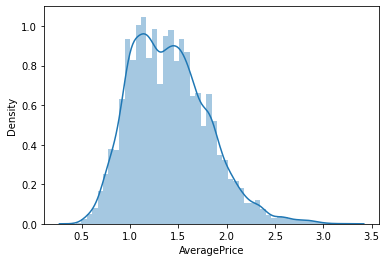

In [14]:
sns.distplot(avcddf.AveragePrice)

In [15]:
avcddf.AveragePrice.skew()


0.5803027378878419

From the graph above it is observed that the AveragePrice data forms a continuous distribution with mean of 1.405978 and tails off from 2.5 mark.



# Analyzing the Feature Columns


In [16]:
avcddf.type.unique()


array(['conventional', 'organic'], dtype=object)

In [17]:
avcddf.type.value_counts() # to find the total values contained in each of the 2 categories.


conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

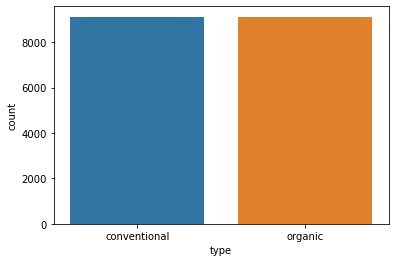

In [18]:
sns.countplot(avcddf.type)


Nearly equal numbers of conventional and organic avocados were produced.



In [19]:
avcddf.year.unique()


array([2015, 2016, 2017, 2018], dtype=int64)

<AxesSubplot:xlabel='year', ylabel='count'>

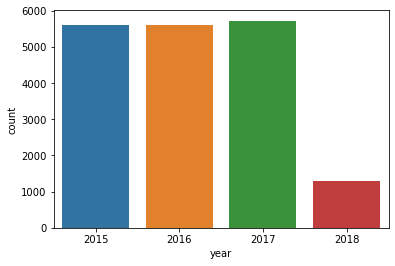

In [20]:
sns.countplot(avcddf.year)


Less count for 2018



In [21]:
avcddf.region.nunique()


54

region column has 54 unique categories



In [22]:
avcddf.region.value_counts()


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [23]:
avcddf.nunique()


Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [24]:
avcddftest = avcddf.head(300) 


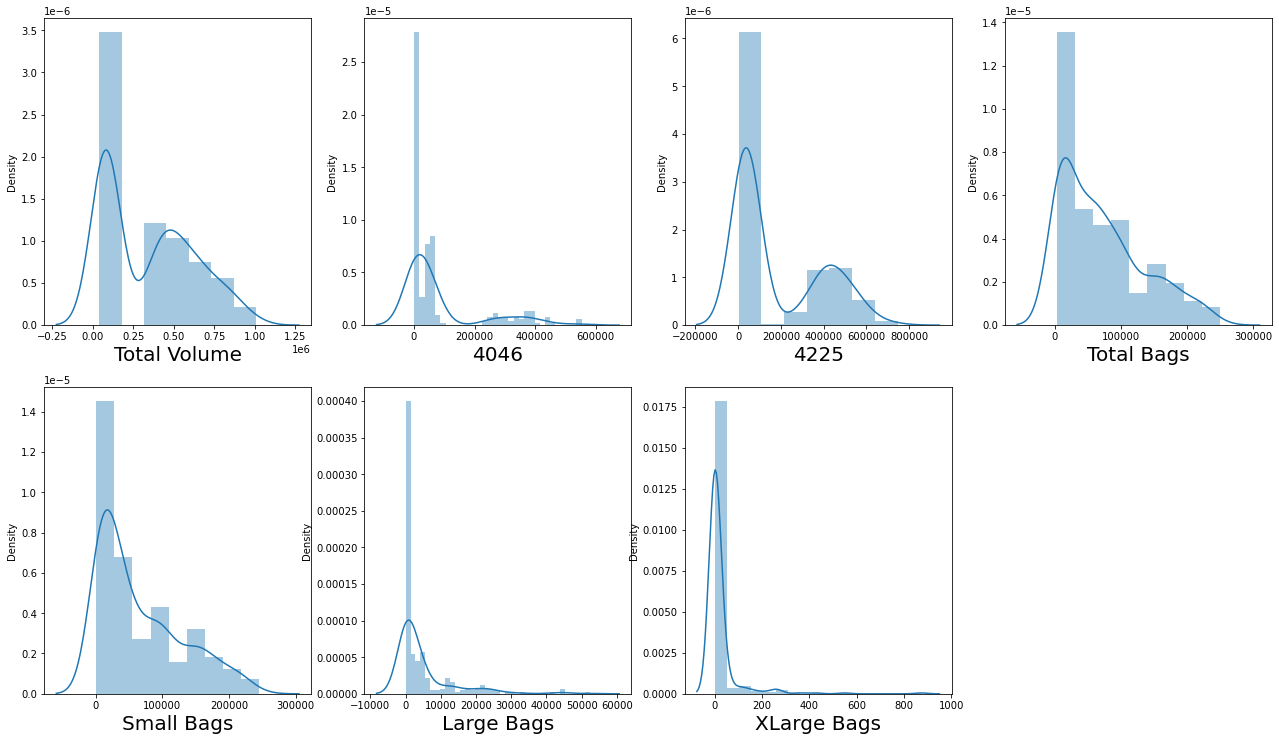

In [25]:
plt.figure(figsize=(22,26),facecolor='white')
plotnum=1
for col in avcddftest[['Total Volume','4046','4225','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(avcddftest[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Total Volume, 4046, 4225 show a bimodal data distribution



# columns have skewed data distribution



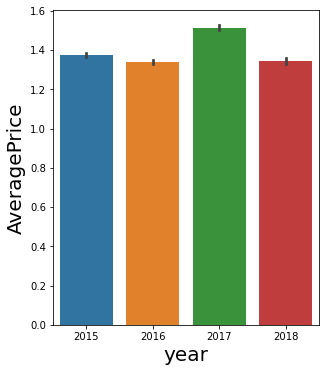

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = avcddf['AveragePrice']
X = avcddf[['year']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

It is observed that there was a spike in average price in the year 2017

relationship between 'Date' and 'AveragePrice'

Text(0.5, 1.0, 'Average Price Trend')

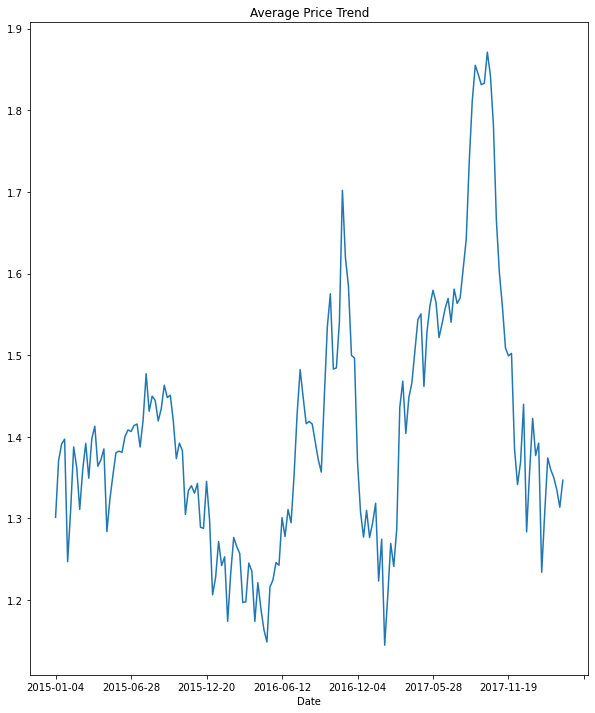

In [27]:
plt.figure(figsize=(10,12))
avcddf.groupby('Date').mean()['AveragePrice'].plot()
plt.title('Average Price Trend')

It is observed from the graph above that 2017 has highest peak and 2015-2016 has steep graph



<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

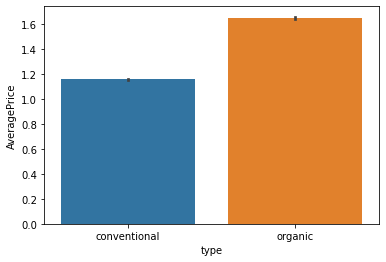

In [28]:
sns.barplot(x = 'type', y = 'AveragePrice', data = avcddf)


Average price of 'Organic' produce is higher than that of 'conventional' produce.



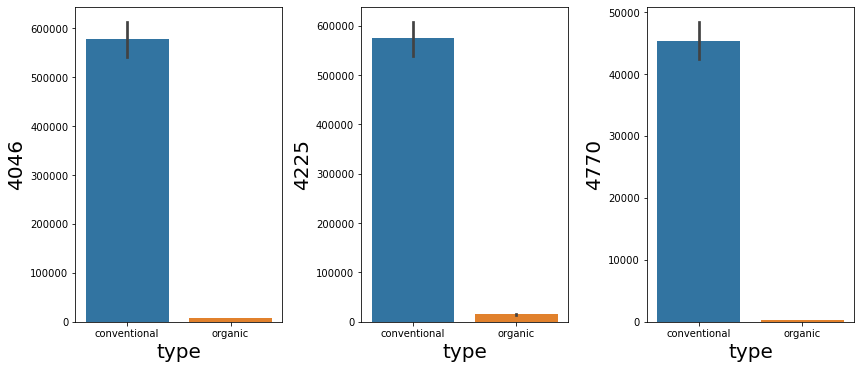

In [29]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = avcddf[['4046','4225','4770']]
X = avcddf['type']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('type',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

production of conventional type outnumbers that of organic type in the cases of 4046,4225 and 4770, which may also be a contributing factor to the higher average price of organic type.

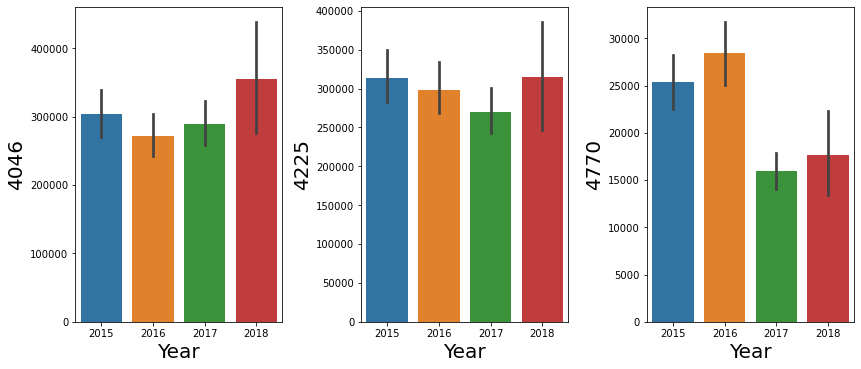

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = avcddf[['4046','4225','4770']]
X = avcddf['year']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and PLU 4770, which is least produced.



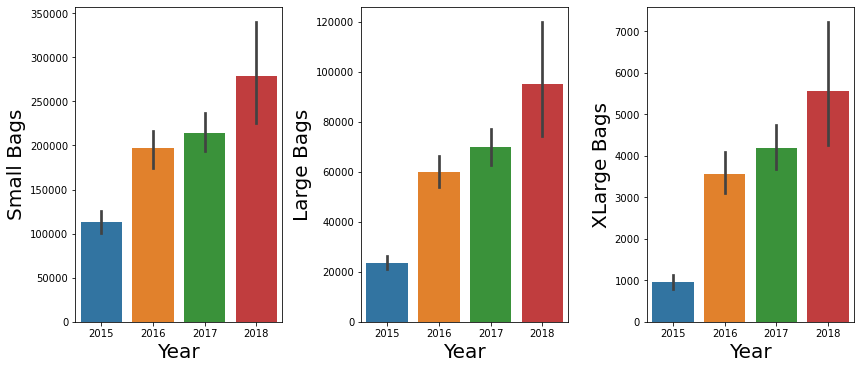

In [33]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = avcddf[['Small Bags','Large Bags','XLarge Bags']]
X = avcddf['year']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Production of all 3 types of bags has grown over the years. However Small Bags are produced far more than Large and Xlarge bags, while XLarge Bags are produced the least.



In [34]:
avcddf.head()


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Creating 'Day' and 'Month' columns from 'Date' Columnn



In [35]:
avcddf['Date']=pd.to_datetime(avcddf['Date']) #creating datetime type dataframe


In [36]:
avcddf['Day']=avcddf['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe


In [37]:
avcddf['Month']=avcddf['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe


In [38]:
avcddf


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [39]:
#Dropping date column
avcddf.drop(columns = ['Date','Total Volume','Total Bags' ],inplace = True)

In [40]:
avcddf

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


# Checking for Outliers in continuous data type Features.


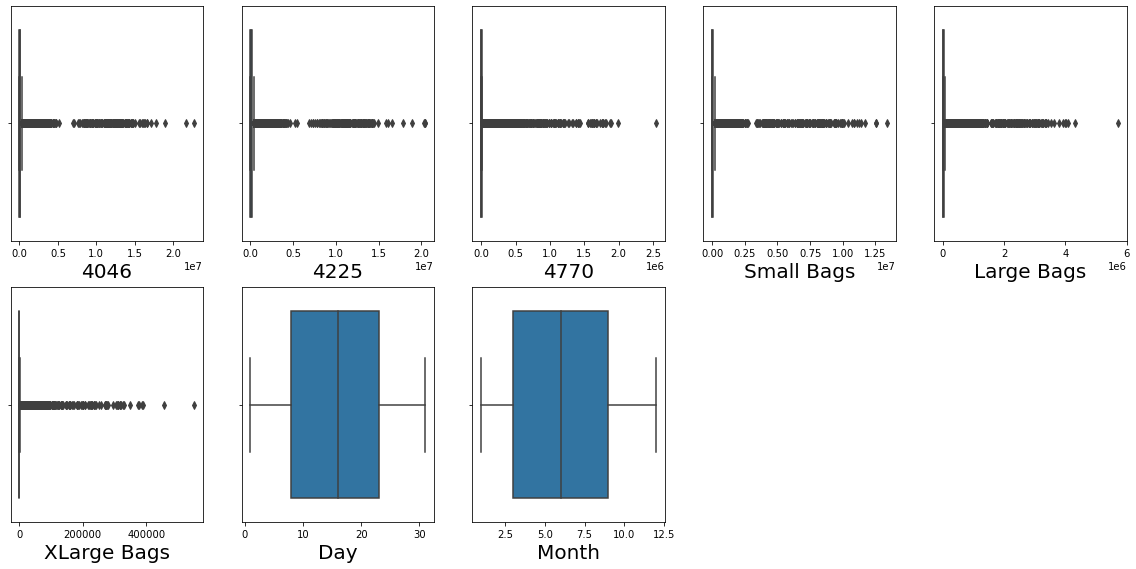

In [41]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in avcddf.drop(columns = ['year','type','region','AveragePrice'],axis=1).columns:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(avcddf[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There are outliers in all of the above columns



# Removing Outliers


Removing Outliers using Z score Method


In [43]:
df2 =avcddf.drop(columns = ['year','type','region','AveragePrice'],axis=1).copy() 
#making a copy of all continuous data type columns.

In [44]:
df2


,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Day,Month
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,27,12
1,674.28,44638.81,58.33,9408.07,97.49,0.0,20,12
2,794.70,109149.67,130.50,8042.21,103.14,0.0,13,12
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,6,12
4,941.48,43838.39,75.78,5986.26,197.69,0.0,29,11
...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,4,2
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,28,1
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,21,1
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,14,1


In [45]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)]
#taking 3 as threshold value

In [46]:
df3.shape


(17782, 8)

In [47]:
loss=(18249-17782)/18249 * 100
loss

2.55904433119623

2.55% Data loss is within acceptable range



# Using IQR Method


In [48]:
df =avcddf.drop(columns = ['year','type','region','AveragePrice'],axis=1).copy() 
#making a copy of all continuous data type columns.

In [49]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [50]:
indxdrop 

array([   52.,    54.,    55., ...,  9121., 18220., 18232.])

In [51]:
df = df.drop(indxdrop)


In [52]:
df.shape


(11747, 8)

Data loss



In [53]:
loss=(18249-11747)/18249 * 100
loss

35.62934955340019

35.62% data loss is outside acceptable range.



# Therefore, Using Z score method to reduce outliers


In [54]:
dropindx = avcddf.index.difference(df3.index)


In [55]:
dropindx


Int64Index([ 346,  359,  780,  781,  783,  787,  788,  790,  791,  792,
            ...
            9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113],
           dtype='int64', length=467)

In [56]:
avcddf.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [58]:
avcddf


,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [59]:
avcddf.reset_index(drop=True,inplace = True) #resetting the index of the dataframe


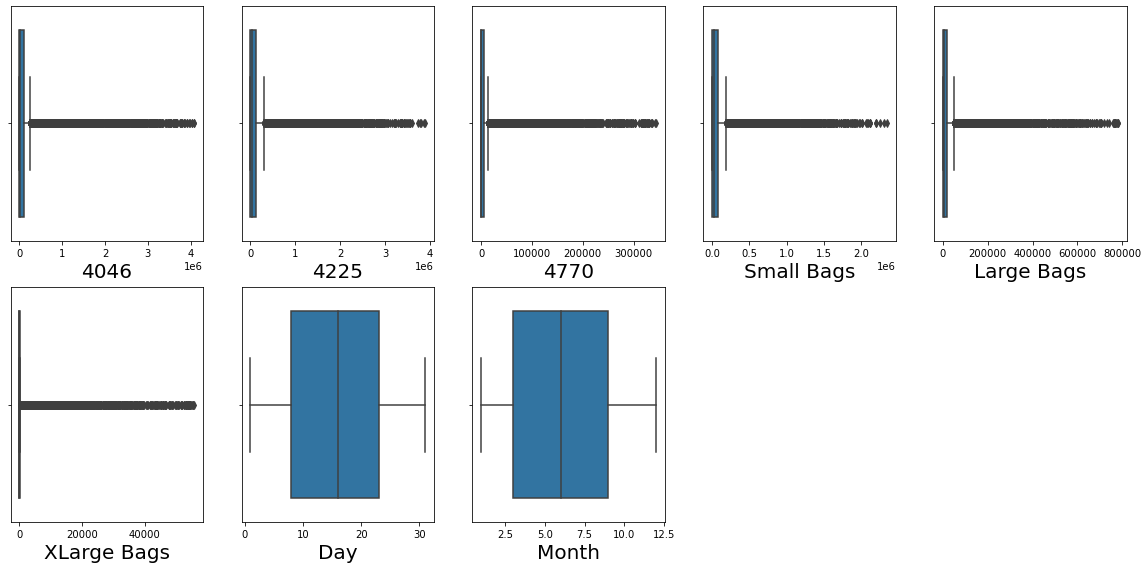

In [60]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in avcddf.drop(columns = ['year','type','region','AveragePrice'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(avcddf[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some amount of outliers has been removed.



# Checking for skewness in data distributions


In [61]:
avcddf.skew()


AveragePrice    0.560969
4046            4.928850
4225            4.472729
4770            5.137120
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

# Normalizing Data Distribution using PowerTransformer


In [62]:
from sklearn.preprocessing import PowerTransformer


In [63]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)


In [64]:
df4 = avcddf.drop(columns = ['year','type','region','AveragePrice'],axis=1)


In [65]:
transformed= powtrans.fit_transform(df4)


In [66]:
type(transformed)


numpy.ndarray

In [67]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [68]:
transformed.skew()


4046          -0.038259
4225          -0.043246
4770           0.028015
Small Bags    -0.024657
Large Bags    -0.110061
XLarge Bags    0.860603
Day           -0.209306
Month         -0.149112
dtype: float64

In [69]:
transformed.index = avcddf.index


In [70]:
Skewed = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']


In [71]:
avcddf[Skewed] = transformed[Skewed]


In [72]:
avcddf.skew()


AveragePrice    0.560969
4046           -0.038259
4225           -0.043246
4770            0.028015
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

A lot of skewness has been removed.



In [73]:
avcddftest = avcddf.head(300) #taking a small sample of the main dataframe to analyse the skewness of data in the continuous type feature columns


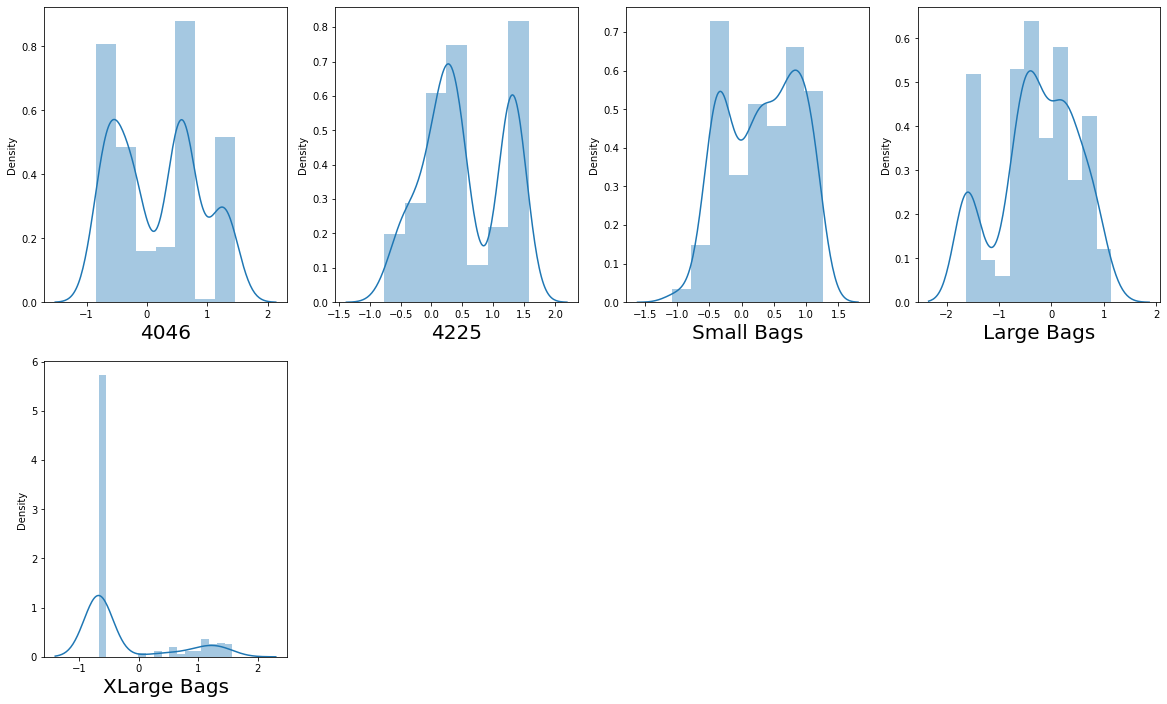

In [74]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in avcddftest[['4046','4225','Small Bags','Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(avcddftest[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Data Distribution looks much more normalised now.



# Encoding 'type' using get_dummies()


In [76]:
dumm = pd.get_dummies(avcddf[['type']],drop_first = False)


In [77]:
dumm


,type_conventional,type_organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
17777,0,1
17778,0,1
17779,0,1
17780,0,1


In [78]:
avcddf = avcddf.join(dumm)


In [79]:
avcddf.drop(columns = ['type'],inplace=True)


In [80]:
avcddf


,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,Albany,27,12,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,Albany,20,12,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,Albany,13,12,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,Albany,6,12,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,Albany,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,WestTexNewMexico,4,2,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,WestTexNewMexico,28,1,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,WestTexNewMexico,21,1,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,WestTexNewMexico,14,1,0,1


# Encoding 'region' using Label Encoder


In [81]:
from sklearn.preprocessing import LabelEncoder


In [82]:
labenc = LabelEncoder()


In [83]:
avcddf.region = labenc.fit_transform(avcddf.region)


In [84]:
avcddf


,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,0,27,12,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,0,20,12,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,0,13,12,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,0,6,12,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,0,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,53,4,2,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,53,28,1,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,53,21,1,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,53,14,1,0,1


# Finding Correlation


In [85]:
a_corr =avcddf.corr()


In [86]:
a_corr.head(23)


,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
AveragePrice,1.000000,-0.548618,-0.448579,-0.491320,-0.493621,-0.477879,-0.387285,0.099910,0.010428,0.024742,0.157900,-0.608447,0.608447
4046,-0.548618,1.000000,0.764679,0.736523,0.778765,0.601899,0.573880,-0.002396,0.159390,-0.004558,-0.025919,0.725826,-0.725826
4225,-0.448579,0.764679,1.000000,0.796799,0.784901,0.614878,0.584508,-0.004533,0.032273,-0.005919,-0.024708,0.747722,-0.747722
4770,-0.491320,0.736523,0.796799,1.000000,0.754305,0.548457,0.616413,-0.051657,0.037805,0.001383,-0.017377,0.780988,-0.780988
Small Bags,-0.493621,0.778765,0.784901,0.754305,1.000000,0.566307,0.603334,0.185955,0.051985,-0.000535,-0.010260,0.720466,-0.720466
Large Bags,-0.477879,0.601899,0.614878,0.548457,0.566307,1.000000,0.452650,0.190295,0.086573,-0.000876,-0.016942,0.500026,-0.500026
XLarge Bags,-0.387285,0.573880,0.584508,0.616413,0.603334,0.452650,1.000000,0.159574,-0.020865,0.010241,0.018751,0.665587,-0.665587
year,0.099910,-0.002396,-0.004533,-0.051657,0.185955,0.190295,0.159574,1.000000,-0.003610,0.004044,-0.173166,-0.007399,0.007399
region,0.010428,0.159390,0.032273,0.037805,0.051985,0.086573,-0.020865,-0.003610,1.000000,0.000751,0.002175,-0.021970,0.021970
Day,0.024742,-0.004558,-0.005919,0.001383,-0.000535,-0.000876,0.010241,0.004044,0.000751,1.000000,0.010456,0.002469,-0.002469


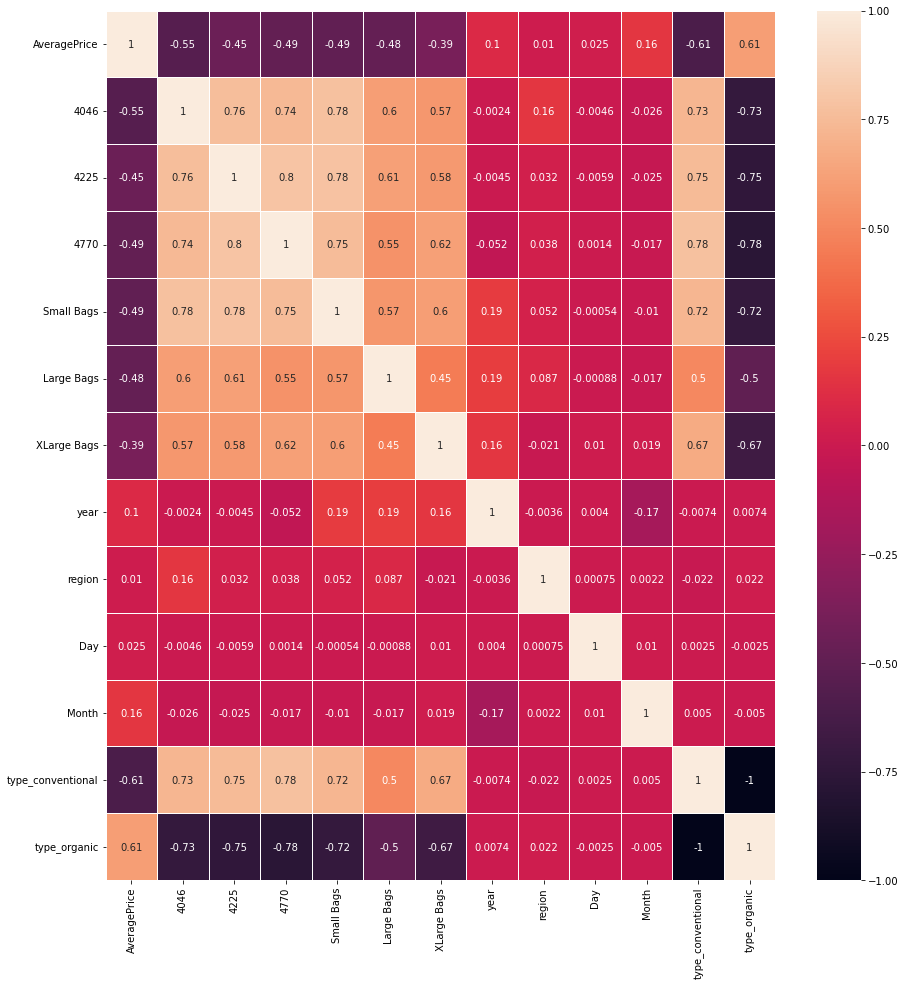

In [87]:
plt.figure(figsize=(15,16))
sns.heatmap(a_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.


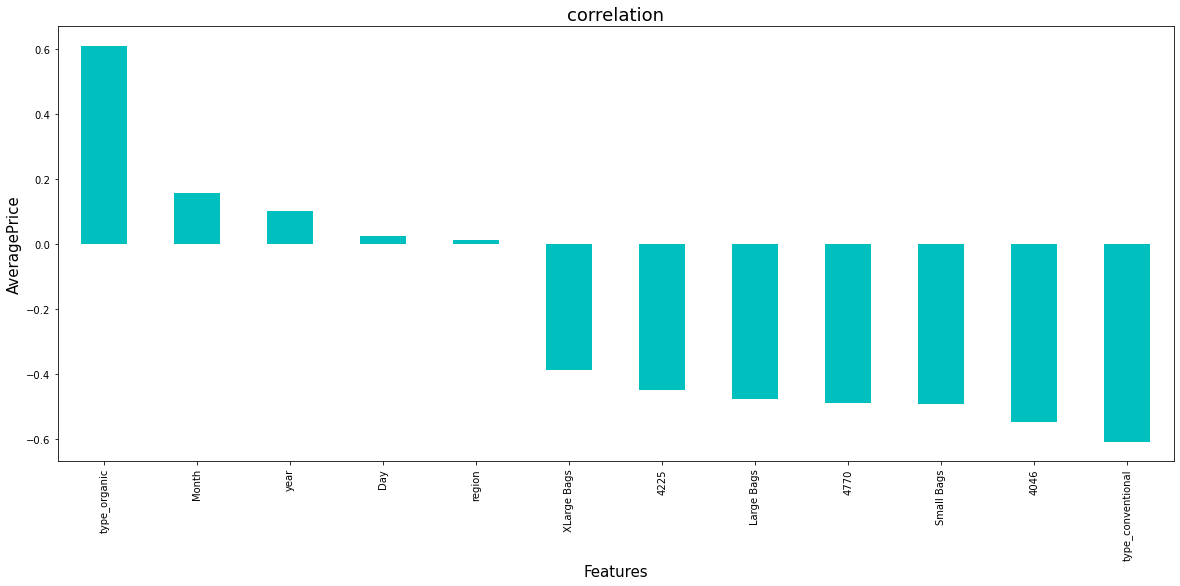

In [88]:
plt.figure(figsize = (20,8))
avcddf.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

From the above graph it can be observed that 'type_organic' has the highest positive correlation with 'AveragePrice', 'type_conventional' has the highest negative correlation while 'region' has the weakest correlation.


# Feature Selection


In [89]:
from sklearn.preprocessing import StandardScaler


In [90]:
X =avcddf.drop(columns=['AveragePrice'])
y =avcddf['AveragePrice']

In [91]:
scaler= StandardScaler()


In [92]:
scaled_X = scaler.fit_transform(X)


# Checking for Multicollinearity using Variance Inflation Factor


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [94]:
vif = pd.DataFrame()


In [95]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [96]:
vif


,Features,vif
0,4046,3.723160
1,4225,4.139977
2,4770,3.940502
3,Small Bags,4.103569
4,Large Bags,1.866024
5,XLarge Bags,2.039339
6,year,1.359839
7,region,1.079283
8,Day,1.000506
9,Month,1.051207


There is no multicollinearity



# Selecting Kbest Features


In [97]:
from sklearn.feature_selection import SelectKBest, f_classif


In [98]:
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [99]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

              Feature      Score
11       type_organic  49.966168
10  type_conventional  49.966168
0                4046  36.480181
2                4770  27.651101
3          Small Bags  25.039951
4          Large Bags  23.354747
1                4225  21.772853
5         XLarge Bags  15.065353
6                year   3.163539
9               Month   2.850599
7              region   1.291093
8                 Day   1.249095


Selecting the best features based on scores above



In [100]:
xbest = X.drop(columns=['region','Day'])


In [101]:
xbest


,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Month,type_conventional,type_organic
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,12,1,0
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,12,1,0
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,12,1,0
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,12,1,0
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,11,1,0
...,...,...,...,...,...,...,...,...,...,...
17777,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,2,0,1
17778,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,1,0,1
17779,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,1,0,1
17780,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,1,0,1


In [102]:
xbest_ss = scaler.fit_transform(xbest) #Scaling features using Standard Scaler


The Data to be predicted in Target / Label column is continuous in nature since it is the Average Price. Therefore Regression Models will be used.


# Regression Model Building


In [103]:
from sklearn.model_selection import train_test_split


In [104]:
from sklearn.metrics import r2_score


# Finding the Best Random State


In [105]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8710604602495455 on random_state: 52


In [106]:
x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state =11)


In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [131]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [132]:
from xgboost import XGBRegressor


In [133]:
from sklearn.metrics import r2_score,mean_squared_error


In [134]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

# Training the Models


In [135]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.



# Ridge Regression Model


In [136]:
y_r_pred = r.predict(x_test)


R2 Score


In [137]:
r2_score(y_test,y_r_pred)


0.5116272273529456

 Mean Squared Error


In [142]:
mean_squared_error(y_test,y_r_pred)


0.07946004793834043

Root Mean Squared Error


In [140]:
np.sqrt(mean_squared_error(y_test,y_r_pred))


0.28188658701389185

# Random Forest Regression Model


In [143]:
y_rf_pred = rf.predict(x_test)


R2 Score


In [144]:
r2_score(y_test,y_rf_pred)


0.8704694655691927

 Mean Squared Error


In [146]:
mean_squared_error(y_test,y_rf_pred)


0.021075094787868464

Root Mean Squared Error


In [147]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))


0.14517263787597326

# XGB Regression Model


In [148]:
y_xg_pred = xg.predict(x_test)


R2 Score


In [150]:
r2_score(y_test,y_xg_pred)


0.8555557182982444

Mean Squared Error


In [151]:
mean_squared_error(y_test,y_xg_pred)


0.023501616370279192

Root Mean Squared Error


In [153]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))


0.15330236909545525

# Support Vector Regression Model


In [154]:
y_svr_pred = SV.predict(x_test)


R2 Score


In [155]:
r2_score(y_test,y_svr_pred)


0.7759036796926372

Mean Squared Error


In [156]:
mean_squared_error(y_test,y_svr_pred)


0.03646129627152166

Root Mean Squared Error


In [158]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))


0.19094841259230635

# Decision Tree Regression Model


In [159]:
y_dt_pred = dt.predict(x_test)


R2 Score


In [160]:
r2_score(y_test,y_dt_pred)


0.7118229952196212

Mean Squared Error


In [161]:
mean_squared_error(y_test,y_dt_pred)


0.046887459533140226

Root Mean Squared Error


In [163]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))


0.2165351230935532

# Model Cross Validation


In [164]:
from sklearn.model_selection import ShuffleSplit,cross_val_score


Ridge Regression


In [165]:
cross_val_score(r,xbest_ss,y,cv=ShuffleSplit(5)).mean()


0.5173110915904615

Random Forest Regression


In [167]:
cross_val_score(rf,xbest_ss,y,cv=ShuffleSplit(5)).mean()


0.8793096464486021

XGB Regression


In [168]:
cross_val_score(xg,xbest_ss,y,cv=ShuffleSplit(5)).mean()


0.8645520343077522

SV Regression


In [169]:
cross_val_score(SV,xbest_ss,y,cv=ShuffleSplit(5)).mean()


0.7701359431297178

Decision Tree Regression


In [170]:
cross_val_score(dt,xbest_ss,y,cv=ShuffleSplit(5)).mean()


0.7332680124219823

Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score


# Hyper Parameter Tuning


# Random Forest Regressor


In [173]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}


In [176]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)


In [ ]:
GridCV.fit(x_train,y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [ ]:
GridCV.best_params_


In [ ]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)


In [ ]:
Best_mod.fit(x_train,y_train)


In [ ]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

Saving The Model


In [ ]:
import joblib
joblib.dump(Best_mod,"BestModelAvocado.pkl")

In [ ]:
Loading The Model


In [ ]:
mod=joblib.load("BestModelAvocado.pkl")


In [ ]:
print(mod.predict(x_test))


In [ ]:
plt.figure(figsize=(10,10))
plt.hist(y_test, rfpred, c='green')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(rfpred), max(y_test))
p2 = min(min(rfpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()